In [4]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'], inplace=True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df.Cabin.str[0]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] =  le.fit_transform(df[feature])
        print(le.classes_)
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

def get_clf_eval(y_test,pred):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
    confusion  = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}')

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('titanic_train.csv')
y = df.Survived 
x = df.drop(columns=['Survived'])
x = transform_features(x)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['female' 'male']
['C' 'N' 'Q' 'S']


In [6]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr_clf = LogisticRegression(max_iter=150)
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742, 재현율:0.7869


In [15]:
pred_proba = lr_clf.predict_proba(X_test)

In [18]:
pred[:3]

array([1, 0, 0], dtype=int64)

In [17]:
pred_proba[:3]

array([[0.46203017, 0.53796983],
       [0.87872733, 0.12127267],
       [0.87717511, 0.12282489]])

In [19]:
import numpy as np

In [23]:
pred_proba

array([[0.46203017, 0.53796983],
       [0.87872733, 0.12127267],
       [0.87717511, 0.12282489],
       [0.88251544, 0.11748456],
       [0.85526601, 0.14473399],
       [0.88216984, 0.11783016],
       [0.88846031, 0.11153969],
       [0.20877482, 0.79122518],
       [0.78289495, 0.21710505],
       [0.36914729, 0.63085271],
       [0.89973075, 0.10026925],
       [0.87508071, 0.12491929],
       [0.87716914, 0.12283086],
       [0.88841448, 0.11158552],
       [0.43698012, 0.56301988],
       [0.85905344, 0.14094656],
       [0.90373136, 0.09626864],
       [0.73345034, 0.26654966],
       [0.72478645, 0.27521355],
       [0.17162115, 0.82837885],
       [0.75361145, 0.24638855],
       [0.61897074, 0.38102926],
       [0.85469626, 0.14530374],
       [0.8146844 , 0.1853156 ],
       [0.88804438, 0.11195562],
       [0.76550859, 0.23449141],
       [0.8596044 , 0.1403956 ],
       [0.92580965, 0.07419035],
       [0.71963478, 0.28036522],
       [0.69554739, 0.30445261],
       [0.

In [26]:
np.concatenate([pred.reshape(-1,1),pred_proba],axis=1)

array([[1.        , 0.46203017, 0.53796983],
       [0.        , 0.87872733, 0.12127267],
       [0.        , 0.87717511, 0.12282489],
       [0.        , 0.88251544, 0.11748456],
       [0.        , 0.85526601, 0.14473399],
       [0.        , 0.88216984, 0.11783016],
       [0.        , 0.88846031, 0.11153969],
       [1.        , 0.20877482, 0.79122518],
       [0.        , 0.78289495, 0.21710505],
       [1.        , 0.36914729, 0.63085271],
       [0.        , 0.89973075, 0.10026925],
       [0.        , 0.87508071, 0.12491929],
       [0.        , 0.87716914, 0.12283086],
       [0.        , 0.88841448, 0.11158552],
       [1.        , 0.43698012, 0.56301988],
       [0.        , 0.85905344, 0.14094656],
       [0.        , 0.90373136, 0.09626864],
       [0.        , 0.73345034, 0.26654966],
       [0.        , 0.72478645, 0.27521355],
       [1.        , 0.17162115, 0.82837885],
       [0.        , 0.75361145, 0.24638855],
       [0.        , 0.61897074, 0.38102926],
       [0.

In [27]:
from sklearn.preprocessing import Binarizer

In [29]:
X = [[1,-1,2],
       [2,0,0],
       [0,1.1,1.2]]
binarizer = Binarizer(threshold=1.1)
binarizer.fit_transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [35]:
custom_threshold = 0.6
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
# pred_proba_1

binarizer = Binarizer(threshold=custom_threshold)
custom_pred = binarizer.fit_transform(pred_proba_1)
# custom_pred

get_clf_eval(y_test,custom_pred)
# custom_threshold = 0.5
# 오차행렬 
# [[104  14]
#  [ 13  48]]
# 정확도:0.8492, 정밀도:0.7742, 재현율:0.7869
# custom_threshold = 0.4
# 오차행렬
# [[98 20]
#  [10 51]]
# 정확도:0.8324, 정밀도:0.7183, 재현율:0.8361

오차행렬
[[112   6]
 [ 16  45]]
정확도:0.8771, 정밀도:0.8824, 재현율:0.7377


In [37]:
custom_thresholds = [0.4,0.45,0.5,0.55,0.6]
def get_eval_by_threshold(y_test,pred_proba_c1,custom_thresholds):
    for custom_threshold in custom_thresholds:
        binarizer = Binarizer(threshold=custom_threshold)
        custom_pred = binarizer.fit_transform(pred_proba_c1)
        print('임계값:',custom_threshold)
        get_clf_eval(y_test,custom_pred)        

In [38]:
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),custom_thresholds)

임계값: 0.4
오차행렬
[[98 20]
 [10 51]]
정확도:0.8324, 정밀도:0.7183, 재현율:0.8361
임계값: 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도:0.8492, 정밀도:0.7656, 재현율:0.8033
임계값: 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742, 재현율:0.7869
임계값: 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도:0.8659, 정밀도:0.8364, 재현율:0.7541
임계값: 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도:0.8771, 정밀도:0.8824, 재현율:0.7377


In [39]:
from sklearn.metrics import precision_recall_curve

In [42]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]

In [43]:
pred_proba_c1.shape

(179,)

In [44]:
y_test.shape

(179,)

In [46]:
precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)

In [47]:
precisions.shape,recalls.shape,thresholds.shape

((166,), (166,), (165,))

In [48]:
thresholds

array([0.01162493, 0.05292686, 0.062318  , 0.06369866, 0.06866715,
       0.07099552, 0.07240414, 0.07419035, 0.07566977, 0.07571476,
       0.083397  , 0.09125485, 0.09161476, 0.091634  , 0.0944669 ,
       0.09457755, 0.09626864, 0.09751855, 0.10026925, 0.10068904,
       0.10071285, 0.10122773, 0.10388615, 0.10388839, 0.10391351,
       0.10794091, 0.10885434, 0.11153969, 0.11157669, 0.11158552,
       0.11195562, 0.1119901 , 0.11620196, 0.11711114, 0.11748456,
       0.11783016, 0.11803465, 0.12127267, 0.12277042, 0.12282489,
       0.12282593, 0.12283086, 0.12443288, 0.12491929, 0.12546934,
       0.12693137, 0.12832044, 0.12880668, 0.1308353 , 0.13272898,
       0.13289206, 0.13317163, 0.1403956 , 0.14094656, 0.14099351,
       0.14100051, 0.14473399, 0.14530374, 0.14823973, 0.14824004,
       0.14969273, 0.15358269, 0.15411531, 0.16819476, 0.16834086,
       0.18369282, 0.1853156 , 0.18617149, 0.19705183, 0.19842592,
       0.19865585, 0.21710505, 0.22636067, 0.23234071, 0.23394

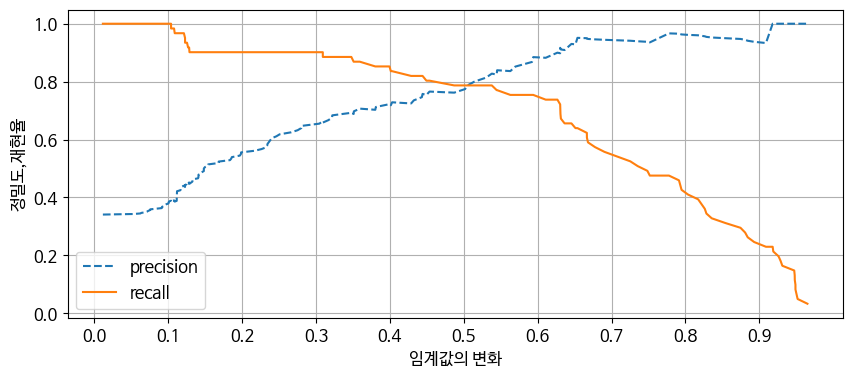

In [62]:
def precision_recall_curve_plot(y_test,pred_proba_c1):
    import matplotlib.pyplot as plt
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    plt.figure(figsize=(10,4))
    plt.plot(thresholds, precisions[:-1],linestyle='--',label='precision')
    plt.plot(thresholds, recalls[:-1],label='recall')
    start , end = plt.xlim()
    plt.xticks(np.round(np.arange(0 , 1, 0.1),2))
    plt.xlabel('임계값의 변화')
    plt.ylabel('정밀도,재현율')
    plt.legend()
    plt.grid()
    
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

In [66]:
def get_clf_eval(y_test,pred,pred_proba=None):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score
    confusion  = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}, f1:{f1:.4f}, auc:{roc_auc:.4f}')

In [67]:
get_clf_eval(y_test,pred,pred_proba[:,1])

오차행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742, 재현율:0.7869, f1:0.7805, auc:0.9024


In [69]:
custom_thresholds = [0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test,pred_proba_c1,custom_thresholds):
    for custom_threshold in custom_thresholds:
        binarizer = Binarizer(threshold=custom_threshold)
        custom_pred = binarizer.fit_transform(pred_proba_c1)
        print('임계값:',custom_threshold)
        get_clf_eval(y_test,custom_pred,pred_proba_c1)        
        
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),custom_thresholds)

임계값: 0.4
오차행렬
[[98 20]
 [10 51]]
정확도:0.8324, 정밀도:0.7183, 재현율:0.8361, f1:0.7727, auc:0.9024
임계값: 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도:0.8492, 정밀도:0.7656, 재현율:0.8033, f1:0.7840, auc:0.9024
임계값: 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742, 재현율:0.7869, f1:0.7805, auc:0.9024
임계값: 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도:0.8659, 정밀도:0.8364, 재현율:0.7541, f1:0.7931, auc:0.9024
임계값: 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도:0.8771, 정밀도:0.8824, 재현율:0.7377, f1:0.8036, auc:0.9024
